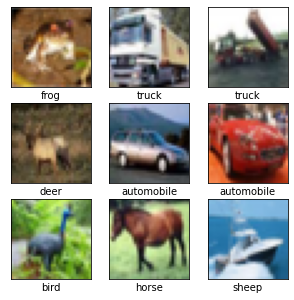

In [1]:
from tensorflow.keras.datasets import cifar10

class_names=['airplane', 'automobile', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

import matplotlib.pyplot as plt
import numpy as np

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[int(t_train[i])])
plt.show()



In [2]:
from tensorflow.keras.datasets import cifar10

class_names=['airplane', 'automobile', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

import matplotlib.pyplot as plt
import numpy as np

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)


x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, t_train, t_val = train_test_split(x_train, t_train,
                                                 test_size=0.3)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
#(32, 32, 3)의 데이터를 입력 받습니다.
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(784,)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [4]:
history = model.fit(x_train, t_train,
         epochs=30,
         batch_size=32,
         validation_data=(x_val, t_val))

Epoch 1/30
1094/1094 [==============================] - 74s 67ms/step - loss: 1.6513 - acc: 0.3981 - val_loss: 1.4450 - val_acc: 0.4831
Epoch 2/30
1094/1094 [==============================] - 73s 67ms/step - loss: 1.3074 - acc: 0.5303 - val_loss: 1.2669 - val_acc: 0.5355
Epoch 3/30
1094/1094 [==============================] - 73s 67ms/step - loss: 1.1377 - acc: 0.5943 - val_loss: 1.1301 - val_acc: 0.5977
Epoch 4/30
1094/1094 [==============================] - 73s 67ms/step - loss: 1.0160 - acc: 0.6440 - val_loss: 1.0227 - val_acc: 0.6391
Epoch 5/30
1094/1094 [==============================] - 73s 67ms/step - loss: 0.9107 - acc: 0.6826 - val_loss: 0.9722 - val_acc: 0.6571
Epoch 6/30
1094/1094 [==============================] - 75s 69ms/step - loss: 0.8268 - acc: 0.7128 - val_loss: 0.9398 - val_acc: 0.6721
Epoch 7/30
1094/1094 [==============================] - 75s 68ms/step - loss: 0.7550 - acc: 0.7370 - val_loss: 0.8667 - val_acc: 0.6957
Epoch 8/30
1094/1094 [==========================

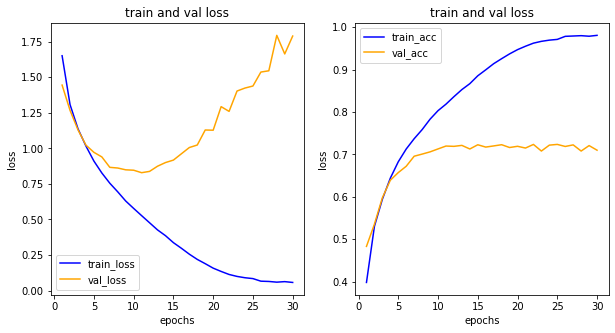

In [5]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()


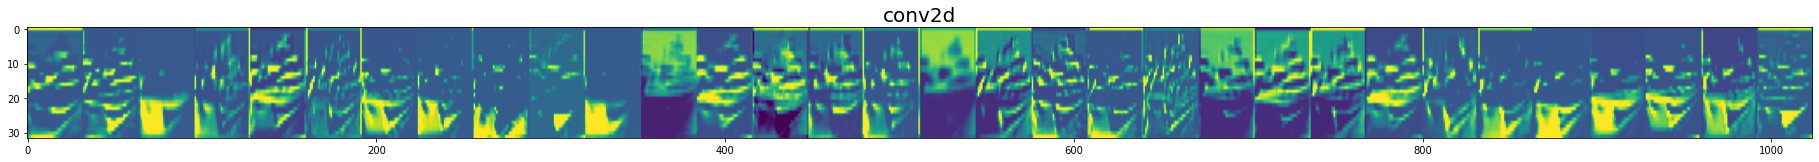

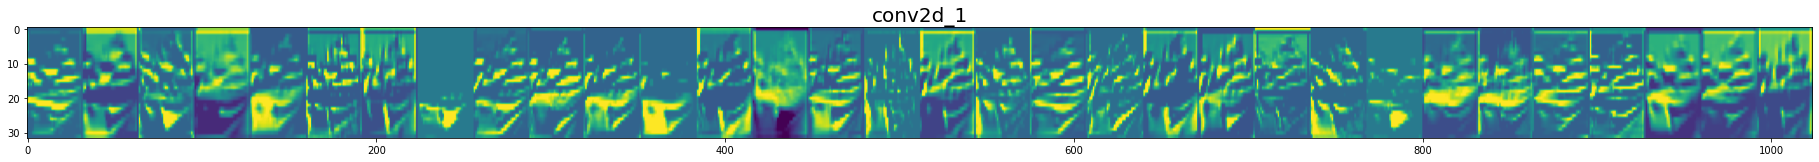

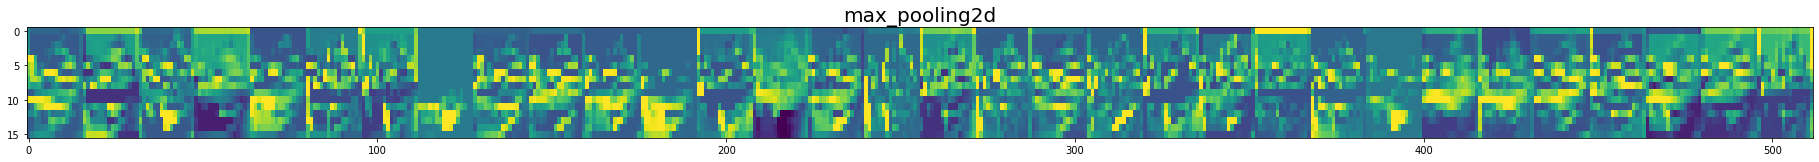

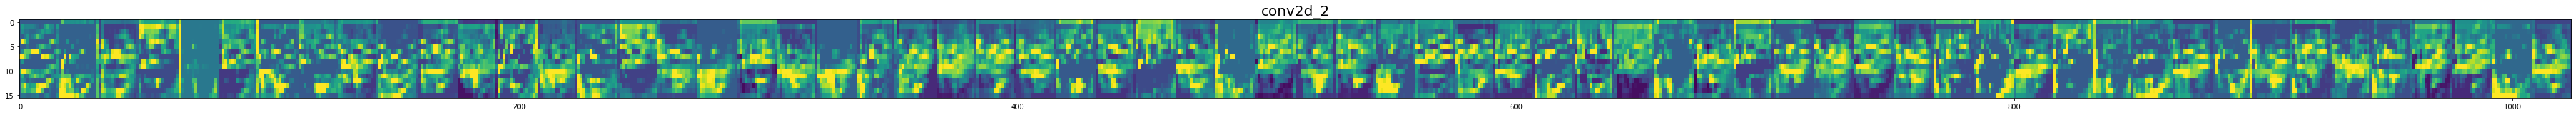

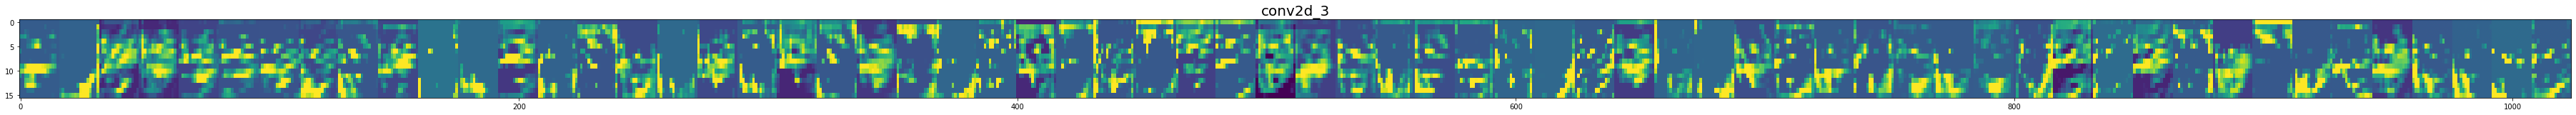

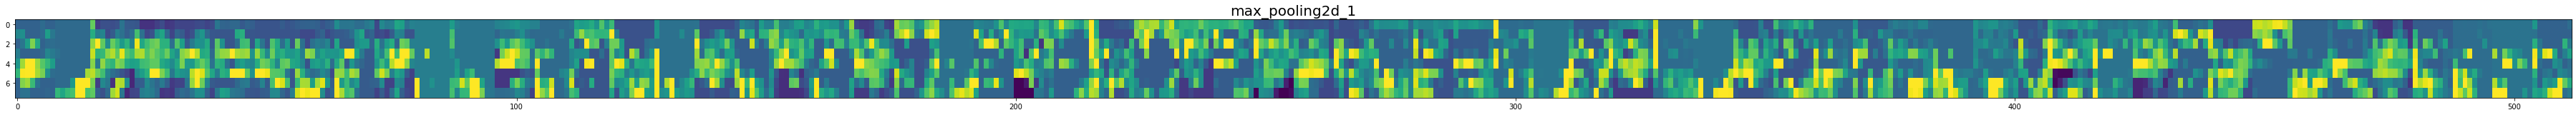

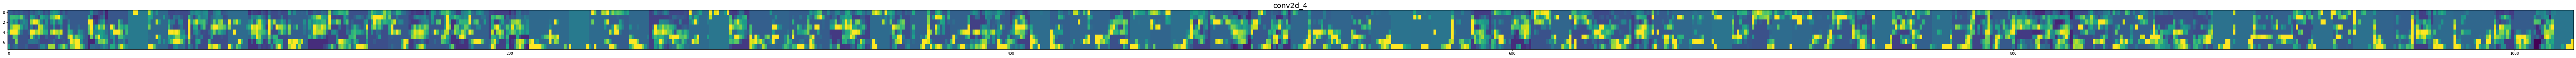

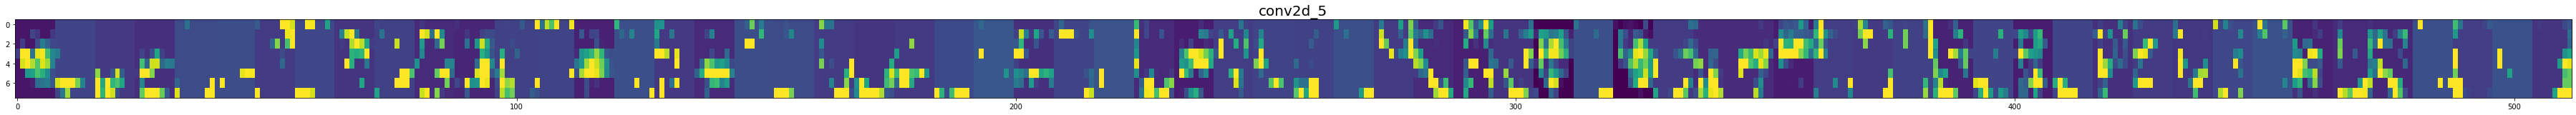

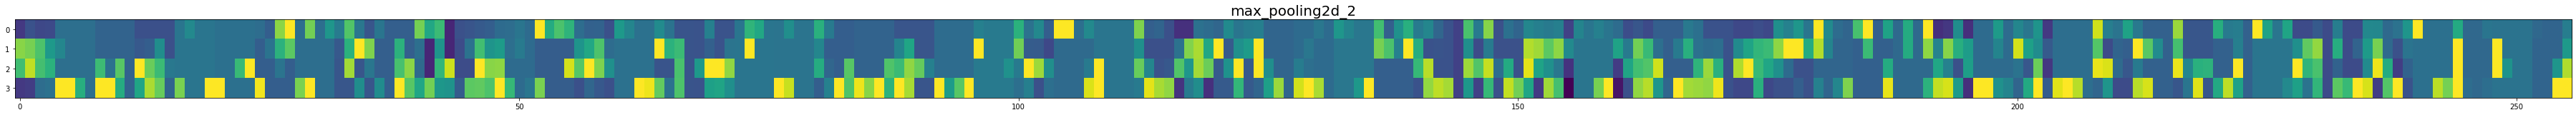

In [12]:
import tensorflow as tf
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

# 모델 전체에서 output을 가져옵니다.
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output)

test_img = np.expand_dims(x_test[1], axis=0)
feature_maps= visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    if(len(feature_map.shape) == 4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        display_grid = np.zeros((img_size, img_size * features))
        
        for i in range(features):
            x = feature_map[0, :, :, i]
            x -= x.mean(); x /= x.std()
            x *= 64; x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * img_size : (i + 1) * img_size] = x
        plt.figure(figsize=(features, 2 + 1./features))
        plt.title(layer_name, fontsize=20)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap='viridis')

In [13]:
# 과대적합이 될 가능성이 농후할 경우
# 예방책
# 규제화 함수
# 임의로 모델의 복잡도를 제한시키는 것
# L1노름(가중치의 절대값핪), L2 노름(가중치의 제곱합), 
# L1 + L2 = 엘라스틱넷(혼합(절대값합 + 제곱값))
# 가중치 감쇠
# 기능에 맞게 가중치의 합을 구하여 손실함수에 더하게 됩니다.
# L2의 가중치의 제곱합 + 손실함수

# 규제화 함수 사용한 모델
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu', kernel_regularizer=l2(0.001)))

# pool_size = 커널의 크기, kernel_size처럼 하나의 숫자로 사용할 수 있다.
# strides = 스트라이드 크기, 기본값 : None, 만약에 값을 적어주지 않는다면
# pool_size와 동일한 크기로 지정
# padding = 데이터의 크기를 동일하게 얻기위해서 사용되는 것
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

Epoch 1/30
1094/1094 [==============================] - 80s 74ms/step - loss: 2.1259 - acc: 0.4147 - val_loss: 1.8143 - val_acc: 0.5107
Epoch 2/30
1094/1094 [==============================] - 79s 72ms/step - loss: 1.6963 - acc: 0.5464 - val_loss: 1.6576 - val_acc: 0.5667
Epoch 3/30
1094/1094 [==============================] - 79s 72ms/step - loss: 1.4947 - acc: 0.6149 - val_loss: 1.4598 - val_acc: 0.6229
Epoch 4/30
1094/1094 [==============================] - 79s 72ms/step - loss: 1.3437 - acc: 0.6605 - val_loss: 1.3381 - val_acc: 0.6519
Epoch 5/30
1094/1094 [==============================] - 81s 74ms/step - loss: 1.2246 - acc: 0.6983 - val_loss: 1.2852 - val_acc: 0.6744
Epoch 6/30
1094/1094 [==============================] - 79s 72ms/step - loss: 1.1291 - acc: 0.7253 - val_loss: 1.2188 - val_acc: 0.6917
Epoch 7/30
1094/1094 [==============================] - 78s 71ms/step - loss: 1.0367 - acc: 0.7557 - val_loss: 1.2084 - val_acc: 0.6994
Epoch 8/30
1094/1094 [==========================

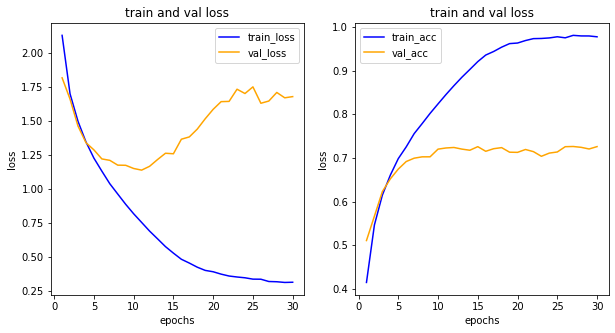

In [14]:
history = model.fit(x_train, t_train,
         epochs=30,
         batch_size=32,
         validation_data=(x_val, t_val))



In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()

Epoch 1/30
1094/1094 [==============================] - 83s 76ms/step - loss: 1.7223 - acc: 0.3695 - val_loss: 1.4881 - val_acc: 0.4605
Epoch 2/30
1094/1094 [==============================] - 83s 75ms/step - loss: 1.3675 - acc: 0.5067 - val_loss: 1.2732 - val_acc: 0.5489
Epoch 3/30
1094/1094 [==============================] - 82s 75ms/step - loss: 1.2110 - acc: 0.5693 - val_loss: 1.1576 - val_acc: 0.5867
Epoch 4/30
1094/1094 [==============================] - 82s 75ms/step - loss: 1.0811 - acc: 0.6173 - val_loss: 1.0777 - val_acc: 0.6206
Epoch 5/30
1094/1094 [==============================] - 82s 75ms/step - loss: 0.9754 - acc: 0.6557 - val_loss: 0.9512 - val_acc: 0.6651
Epoch 6/30
1094/1094 [==============================] - 82s 75ms/step - loss: 0.8911 - acc: 0.6868 - val_loss: 0.8973 - val_acc: 0.6858
Epoch 7/30
1094/1094 [==============================] - 82s 75ms/step - loss: 0.8236 - acc: 0.7092 - val_loss: 0.8211 - val_acc: 0.7145
Epoch 8/30
1094/1094 [==========================

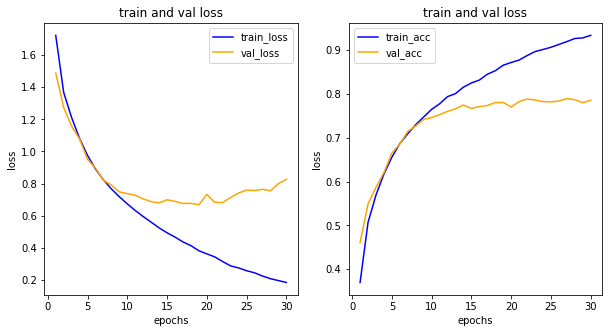

In [6]:
# 드롭아웃
# 과대적합을 피하기 위해서 사용되는 대표적인 방법 중 하나입니다.
# 학습이 진행되는 동안 신경망의 일부 유닛을 제외합니다.
# 제외하지 않은 유닛을 집중적으로 학습하게 되면서
# 과대적합 문제를 방지하고 더 나은 성능을 기대할 수 있다.
# 보통 드롭아웃 비율을 0.2 ~ 0.5를 사용한다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

history = model.fit(x_train, t_train,
         epochs=30,
         batch_size=32,
         validation_data=(x_val, t_val))

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()

In [7]:
# 배치정규화
# 과대적합의 해결책은 아님.
# 내부 공신성 확인.
# 신경망층의 출력밧이 다양한 입력데이터에 따라서 바뀔 수 있다.
# 매우 큰 범위의 출력값은 불안정하게 성능 저하를 일으킬 수 있다.
# 배치 정규화는 신경망층의 출력값이 가질 수 있는 범위 줄여줘서
# 불확실성을 감소시키는 방법
# Dense -> Conv2D -> BatchNormalization -> Activation -> Maxpool
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

history = model.fit(x_train, t_train,
         epochs=30,
         batch_size=32,
         validation_data=(x_val, t_val))


Epoch 1/30
1094/1094 [==============================] - 117s 107ms/step - loss: 1.6127 - acc: 0.4161 - val_loss: 1.4206 - val_acc: 0.4973
Epoch 2/30
1094/1094 [==============================] - 117s 107ms/step - loss: 1.1793 - acc: 0.5847 - val_loss: 1.1571 - val_acc: 0.5896
Epoch 3/30
1094/1094 [==============================] - 116s 106ms/step - loss: 0.9539 - acc: 0.6668 - val_loss: 1.1324 - val_acc: 0.6015
Epoch 4/30
1094/1094 [==============================] - 117s 107ms/step - loss: 0.7770 - acc: 0.7352 - val_loss: 1.0682 - val_acc: 0.6261
Epoch 5/30
1094/1094 [==============================] - 116s 106ms/step - loss: 0.6223 - acc: 0.7939 - val_loss: 1.0657 - val_acc: 0.6378
Epoch 6/30
1094/1094 [==============================] - 116s 106ms/step - loss: 0.4868 - acc: 0.8463 - val_loss: 1.0817 - val_acc: 0.6417
Epoch 7/30
1094/1094 [==============================] - 116s 106ms/step - loss: 0.3710 - acc: 0.8873 - val_loss: 1.1496 - val_acc: 0.6366
Epoch 8/30
1094/1094 [============

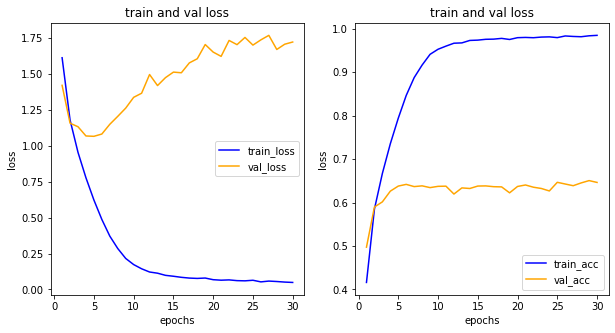

In [8]:

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()

In [ ]:
# 데이터 증식
# 기존의 데이터에 변형을 추가해서 새로운 데이터를 만들어내는 방법
# 딥러닝의 고질적인 문제 ? 일반화 문제의 대응점이라고 만들긴 했는데
# 대응이 못됨.
# 장점
# 1) 다양한 데이터를 입력시킴으로써 모델을 더욱 견고하게 만들어 테스트 시
# 더 높은 성능을 기대할 수 있게 한다.
# 2) 수집된 데이터가 적은 경우에 강력한 힘을 발휘한다.

# 이미지 제네레이터를 통해서 데이터 증식을 모델에 입력
# width_shift_range : 임의의 크기만큼 너비 방향으로 이동시킵니다.
# 0.2이고 이미지의 너비가 100이라면 -20 ~ +20 범위에서 너비 방향으로 이동

# height_shift_range : 임의의 크기만큼 높이방향으로 이동시킵니다
# 0.2이고 이미지의 높이가 100이라면 -20 ~ +20 범위에서 높이 방향으로 이동

# brightness_range : 이미지의 밝기 정도를 조정합니다.
# (0.5, 1.5)이면 원본 대비 50%의 비율로 어둡거나 밝게 조절합니다.

# shear_range : 시계 반대 방향으로 밀림 강도를 조절합니다.
# 0.5이면 0.5 ~ 1.5배의 범위에서 이미지의 크기를 조절합니다.

# rotation_range : 이미지를 임의로 회전시킵니다.
# 180이라면, 0 ~ 180 범위에서 임의로 이미지를 회전시킵니다.

# rescale : 이미지 픽셀값의 크기를 조절합니다.
# 1/255라면 각 픽셀값에 해당 값이 곱해집니다.

# fill_mode : 이미지 변환시 새로 생기는 픽셀을 채울 방법을 결정합니다.
# ['nearest', 'constant', 'reflect or wrap']

# horizontal_flip : True일 경우 임의로 이미지를 수평 방향으로 뒤집습니다.

# vertical_filp : True일 경우 임의로 이지지를 수직 방향으로 뒤집습니다.

# preprocessing_function : 사용자 정의 전처리 함수 또는 전처리 함수를 적용합니다.

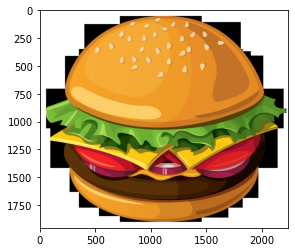

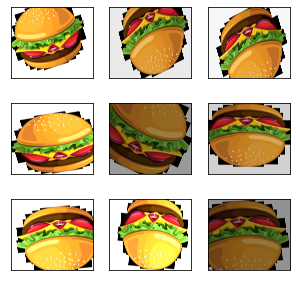

In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  vertical_flip = True,
                                  shear_range = 0.5,
                                  brightness_range=[0.5, 1.5],
                                  zoom_range = 0.2,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  rotation_range=30,
                                  fill_mode = 'nearest')


hamburger = img_to_array(load_img('./data/hamburger.png')).astype(np.uint8)
plt.figure()
plt.imshow(hamburger)

hamburger = hamburger.reshape((1,) + hamburger.shape)
train_generator = train_datagen.flow(hamburger, batch_size = 1)

plt.figure(figsize=(5,5))
for i in range(9):
    data = next(train_generator)
    image = data[0]
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(image, dtype=np.uint8), cmap='gray')
plt.show()

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
class_names=['airplane', 'automobile', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

import matplotlib.pyplot as plt
import numpy as np

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)


x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, t_train, t_val = train_test_split(x_train, t_train,
                                                 test_size=0.3)

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  zoom_range = 0.2,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  rotation_range=30,
                                  fill_mode = 'nearest')

val_datagen = ImageDataGenenrator()

batch_size = 32

train_generator = train_datagen.flow(x_train,t_train,
                                    batch_size = batch_size)

val_generator = val_datagen.flow(x_Val, t_val,
                                batch_size = batch_size)